# Dataset: Hotel Reservations


In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('./Hotel.csv')

Conjunto de dados para coleta de informações de reservas de hóspedes de hotéis
Sobre as colunas

* ID: identificador único de cada reserva
* n_adults: Número de adultos
* n_children: Número de crianças
* weekend_nights: Número de noites de fim de semana (sábado ou domingo) em que o hóspede se hospedou ou reservou hospedagem no hotel
* week_nights: Número de noites de semana (segunda a sexta) em que o hóspede se hospedou ou reservou hospedagem no hotel
* meal_plan: Tipo de plano de refeições reservado pelo cliente
* car_parking_space: O cliente precisa de uma vaga de estacionamento? (0 - Não, 1 - Sim)
* room_type: Tipo de quarto reservado pelo cliente. Os valores são criptografados (codificados) pela INN Hotels.
* lead_time: Número de dias entre a data da reserva e a data de chegada
* year: Ano da data de chegada
* month: Mês da data de chegada
* date: Dia do mês
* market_segment: Designação do segmento de mercado.

* repeated_guest: O cliente é um hóspede frequente? (0 - Não, 1 - Sim)
* previous_cancellations: Número de reservas anteriores que foram canceladas pelo cliente antes da reserva atual
* previous_bookings_not_canceled: Número de reservas anteriores não canceladas pelo cliente antes da reserva atual
* avg_room_price: Preço médio por dia da reserva; os preços dos quartos são dinâmicos. (em euros)
* special_requests: Número total de pedidos especiais feitos pelo cliente (por exemplo, andar alto, vista do quarto, etc.)
* status: Indicador que mostra se a reserva foi cancelada ou não.

In [3]:
df.head(10)

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


## Análises Básicas

In [4]:
# total de registros
len(df) #número de linhas (registros)
df.shape #número de linhas e colunas

(36275, 19)

In [5]:
# linhas com dados faltantes
linhas_com_nulos = df[df.isnull().any(axis=1)]
len(linhas_com_nulos) #não retornou nenhum registro

0

In [6]:
# linhas duplicadas
quantidade_duplicadas = df.duplicated().sum()
quantidade_duplicadas #possui 36024 linhas duplicadas

np.int64(0)

## Estatísticas descritivas

In [7]:
#lista os campos da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              36275 non-null  object 
 1   n_adults                        36275 non-null  int64  
 2   n_children                      36275 non-null  int64  
 3   weekend_nights                  36275 non-null  int64  
 4   week_nights                     36275 non-null  int64  
 5   meal_plan                       36275 non-null  object 
 6   car_parking_space               36275 non-null  int64  
 7   room_type                       36275 non-null  object 
 8   lead_time                       36275 non-null  int64  
 9   year                            36275 non-null  int64  
 10  month                           36275 non-null  int64  
 11  date                            36275 non-null  int64  
 12  market_segment                  

In [8]:
df.describe().round() #estatística dos campos numéricos

,n_adults,n_children,weekend_nights,week_nights,car_parking_space,lead_time,year,month,date,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests
count,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0,36275.0
mean,2.0,0.0,1.0,2.0,0.0,85.0,2018.0,7.0,16.0,0.0,0.0,0.0,103.0,1.0
std,1.0,0.0,1.0,1.0,0.0,86.0,0.0,3.0,9.0,0.0,0.0,2.0,35.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,0.0,1.0,0.0,17.0,2018.0,5.0,8.0,0.0,0.0,0.0,80.0,0.0
50%,2.0,0.0,1.0,2.0,0.0,57.0,2018.0,8.0,16.0,0.0,0.0,0.0,99.0,0.0
75%,2.0,0.0,2.0,3.0,0.0,126.0,2018.0,10.0,23.0,0.0,0.0,0.0,120.0,1.0
max,4.0,10.0,7.0,17.0,1.0,443.0,2018.0,12.0,31.0,1.0,13.0,58.0,540.0,5.0


## Probabilidade Simples

Probabilidade de cancelamento de reserva

In [9]:

total = len(df)

probcancelada = df[df['status'] == 'Canceled'].shape[0] / total

print(probcancelada)



0.32763611302549966


In [10]:
df['status'].value_counts()

status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Probabilidade de haver crianças na reserva

In [11]:

probcriancas = (df['n_children'] > 0).mean()

print(probcriancas)

0.07437629221226741


## Probabilidade da União

Probabilidade de ter criança e ter pedido especial

In [12]:
crianca_pedidoespecial = len(df[(df['n_children'] > 0) & (df['special_requests'] >0)])

probcrianca_pedidoespecial = crianca_pedidoespecial / len(df)

print(f" A probabilidade de ter criança e ter um pedido especial é de {round(probcrianca_pedidoespecial*100,2)}%")

 A probabilidade de ter criança e ter um pedido especial é de 4.83%


## Probabilidade da Intersecção

Probabilidade de ser hóspede frequente e não cancelar a reserva

In [13]:
hospede_freq_nao_cancelar = len(df[(df['repeated_guest'] == 1) & (df['status'] == 'Not_Canceled')])

p_freq_nao_cancelada = hospede_freq_nao_cancelar / len(df)

print(f"A probabiolidade da reserva ser de um hóspede frequente e não ser cancelada é de {round(p_freq_nao_cancelada*100,2)}")

A probabiolidade da reserva ser de um hóspede frequente e não ser cancelada é de 2.52


# Probabilidade do Complemento

Probabilidade de a reservar não ser de um hóspede frequente ou foi cancelada 
(ou ambos)

In [26]:
p_nao_freq_ou_cancelada = 1 - p_freq_nao_cancelada

print(f"Probabilidade de ser hópede não frequente ou cancelada é {round(p_nao_freq_ou_cancelada*100,2)}%")

Probabilidade de ser hópede não frequente ou cancelada é 97.48%


# Teorema de Bayes

Qual a probabilidade de uma reserva ser cancelada, sendo que ela foi feita online?

In [28]:
total = len(df)

p_status_a = len(df[df['status'] == 'Canceled']) / total
p_online_b = len(df[df['market_segment'] == 'Online']) / total

df_canceladas = df[df['status'] == 'Canceled']
p_online_com_status = len(df_canceladas[df_canceladas['market_segment'] == 'Online']) / len(df_canceladas)

print(f"Probabilidade do hospede cancelar sendo reserva online: {round((p_online_com_status * p_status_a) / p_online_b * 100, 2)}%")

Probabilidade do hospede cancelar sendo reserva online: 36.51%


# Variáveis Aleatórias

In [ ]:
adultos = df['n_adults'] # variável aleatória discreta
preco_medio = df['avg_room_price'] # variável aleatória contínua

print(f"Total de adultos: {adultos.sum()} e o Preço Médio dos quartos é: ${preco_medio.mean():.2f}")

Total de adultos: 66926 e o Preço Médio dos quartos é: $103.42


# Função de Probabilidade

In [71]:
fp = adultos.value_counts().sort_index() / total
fp

n_adults
0    0.003832
1    0.212130
2    0.719724
3    0.063873
4    0.000441
Name: count, dtype: float64

# Função Repartição (Cumulativa) 

In [55]:
fp.cumsum()

n_adults
0    0.003832
1    0.215961
2    0.935686
3    0.999559
4    1.000000
Name: count, dtype: float64

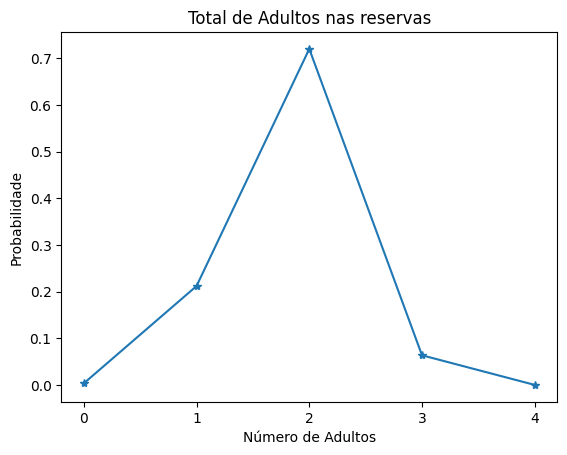

In [63]:
import matplotlib.pyplot as plt
plt.plot(fp.index, fp.values, '*-') 
plt.title('Total de Adultos nas reservas')
plt.xlabel('Número de Adultos')
plt.ylabel('Probabilidade')
plt.xticks(fp.index)
plt.show()

In [68]:
cov_apm = np.cov(adultos, preco_medio)[0, 1]
cov_apm

np.float64(5.403737491487847)

In [69]:
corr_apm = np.corrcoef(adultos, preco_medio)[0, 1]
corr_apm

np.float64(0.2968857360658217)

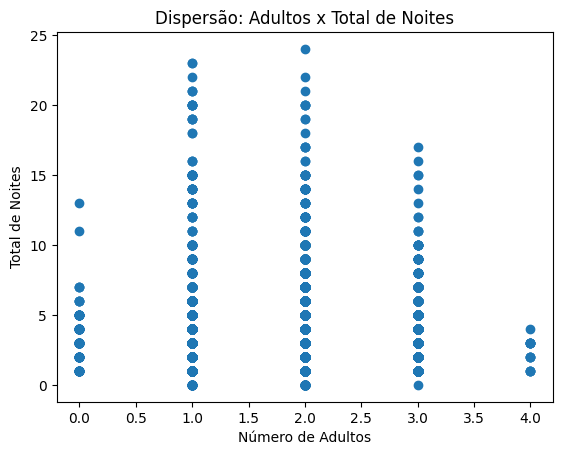

In [76]:
total_noites = df['weekend_nights'] + df['week_nights']
plt.scatter(adultos, total_noites)
plt.title('Dispersão: Adultos x Total de Noites')
plt.xlabel('Número de Adultos')
plt.ylabel('Total de Noites')
plt.show()